In [143]:
# ML
import scipy as sp
import numpy as np
import matplotlib as mp
import matplotlib.pyplot as plt
%matplotlib inline

from collections import defaultdict

data = defaultdict(list)
for l in open('input'):
    f = l.strip().split()
    uid, lat, lon = int(f[0]), float(f[1]), float(f[2])
    data[uid].append((lat, lon))
    

29869512034 0.00178833957721
3434610913 0.00900719551091
27261895063 0.00328137630958
7734788570 0.0017857779779
31378342655 0.00147086188379
29063381903 0.0184703048038
7545248020 0.00154119173672
18608981211 0.0018203601271
9580709172 0.00845671826662
29039766476 0.0226535075154
17258383479 0.0163429522985
14860310208 0.0151436501738
8847493292 0.00169259296404
3387590991 0.0112184918649
8617200272 0.0100896703729
6855396116 0.00182753869215
good/total: 84/101
reduct:28=>3 target:3 0.00178834
cluter-0: 25 points
cluter-1: 1 points
cluter-2: 2 points


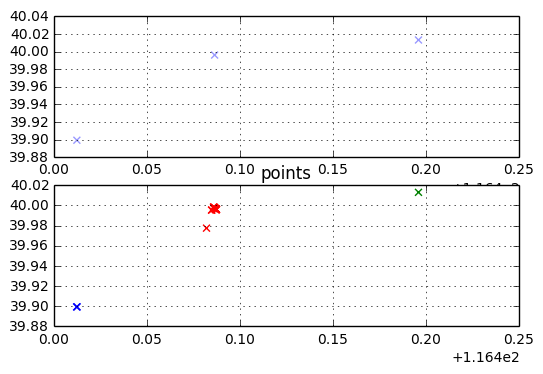

In [174]:

from scipy.cluster.vq import vq,kmeans,whiten

def test():
    uid = 8909940024
    counter = 0
    target_c = 5
    count_ok = 0
    for uid in data:
        points = np.array(data[uid])
        if len(points) < 20:
            continue
        counter += 1
        if counter > 100:
            break
        result_points, distortion = kmeans(points, 3)
        if distortion > 0.0013:
            print uid, distortion
        else:
            count_ok += 1
    print 'good/total: %d/%d' % (count_ok, counter)
    
def test_user(uid, target_cn = None):
    points = np.array(data[uid])
    p1 = plt.subplot(211)
    p1.grid(True)
    result_points = []
    for cn in range(2, 100):
        if target_cn != None:
            cn = target_cn
        result_points, distortion = kmeans(points, cn)
        print 'reduct:%d=>%d target:%d %.8f' % (len(points), len(result_points), cn, distortion)
        if distortion < 1*1e-4 or target_cn != None:
            p1.scatter(result_points[:, 0], result_points[:, 1],s=25,alpha=0.4,marker='x')
            break
        if target_cn != None:
            break
    p2 = plt.subplot(212)
    p2.grid(True)
    idx, _ = vq(points, result_points)
    colors = 'rgbcmykrrrrrrrrrrr'
    for i in range(len(result_points)):
        print 'cluter-%d: %d points' % (i, len(points[idx == i, :]))
        p2.scatter(points[idx == i, 0], points[idx == i, 1],s=25,alpha=1,marker='x',c=colors[i])
    plt.title('points')
    plt.show()

test()
test_user(29869512034, 3)



In [149]:
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)
X = StandardScaler().fit_transform(X)
print X

[[ 0.49426097  1.45106697]
 [-1.42808099 -0.83706377]
 [ 0.33855918  1.03875871]
 ..., 
 [-0.05713876 -0.90926105]
 [-1.16939407  0.03959692]
 [ 0.26322951 -0.92649949]]


[ 0  1  1  1  1 -1 -1 -1  0  0  1  0  2  2 -1  1  2  2 -1  0  0  0  1  0 -1
  0 -1 -1 -1  2 -1  1  2 -1  1 -1]
0
1
2


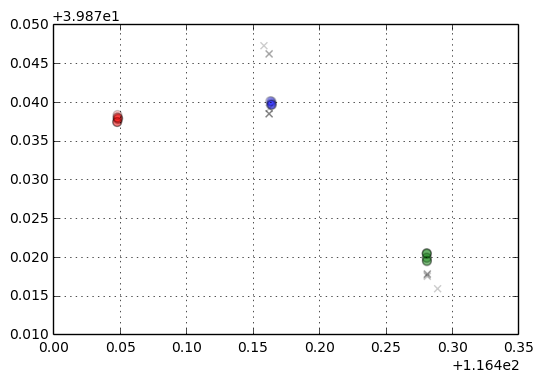

In [210]:
import sklearn
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.001, min_samples=5)
X = np.array(data[6855396116])
label = db.fit_predict(X)
print label

p2 = plt.subplot()
p2.grid(True)
colors = 'rgbcmykrrrrrrrrrrr'
for i in list(set(label) - set((-1,))):
    print i
    p2.scatter(X[label == i, 0], X[label == i, 1],s=40,alpha=0.2,marker='o',c=colors[i])
p2.scatter(X[label == -1, 0], X[label == -1, 1],s=25,alpha=0.2,marker='x',c='black')
plt.show()

